In [89]:
%matplotlib inline
from mxnet import gluon, np, npx

from d2l import tensorflow as tf
from mxnet.gluon import nn
npx.set_np()
import tensorflow as tf
from d2l import tensorflow as d2l
from mxnet.gluon import nn
from d2l import mxnet as d2l

Fashion-MNIST contains 10 classes, and that each image consists of a 28×28 = 784 grid
of grayscale pixel values. we will disregard the spatial structure among the pixels for now,
so we can think of this as simply a classification dataset with 784 input features and 10 classes. To
begin, we will implement an MLP with one hidden layer and 256 hidden units. Note that we can
regard both of these quantities as hyperparameters. Typically, we choose layer widths in powers of
2, which tend to be computationally efficient because of how memory is allocated and addressed
in hardware.
Again, we will represent our parameters with several tensors. Note that for every layer, we must
keep track of one weight matrix and one bias vector. As always, we allocate memory for the gradients of the loss with respect to these parameters.

In [64]:
# build the model
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = tf.Variable(
            tf.random.normal((num_inputs, num_hiddens)) * sigma)
        self.b1 = tf.Variable(tf.zeros(num_hiddens))
        self.W2 = tf.Variable(
            tf.random.normal((num_hiddens, num_outputs)) * sigma)
        self.b2 = tf.Variable(tf.zeros(num_outputs))

In [65]:
# create own activation function
def relu(X):
    return tf.math.maximum(X, 0)

In [66]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = tf.reshape(X, (-1, self.num_inputs))
    H = relu(tf.matmul(X, self.W1) + self.b1)
    return tf.matmul(H, self.W2) + self.b2

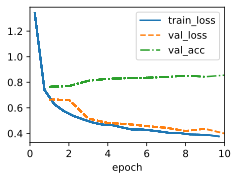

In [67]:
# Training
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

# a concize implementation using tf.keras

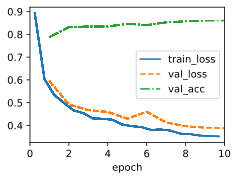

In [70]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation= 'relu'),
            tf.keras.layers.Dense(num_outputs)])
        
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

# Exercises
1.Change the number of hidden units num_hiddens and plot how its number affects the accuracy of the model. What is the best value of this hyperparameter?

2.Try adding a hidden layer to see how it affects the results.

3.Why is it a bad idea to insert a hidden layer with a single neuron? What could go wrong?

4.How does changing the learning rate alter your results? With all other parameters fixed, which learning rate gives you the best results? How does this relate to the number of epochs?

5.Let's optimize over all hyperparameters jointly, i.e., learning rate, number of epochs, number of hidden layers, and number of hidden units per layer.
What is the best result you can get by optimizing over all of them?

6.Why it is much more challenging to deal with multiple hyperparameters?

7.Describe an efficient strategy for optimizing over multiple parameters jointly.

8.Compare the speed of the framework and the from-scratch implementation for a challenging problem. How does it change with the complexity of the network?


9.Measure the speed of tensor-matrix multiplications for well-aligned and misaligned matrices. For instance, test for matrices with dimension 1024, 1025, 1026, 1028, and 1032.

10.How does this change between GPUs and CPUs?

11.Determine the memory bus width of your CPU and GPU.

12.Try out different activation functions. Which one works best?

13.Is there a difference between weight initializations of the network? Does it matter?

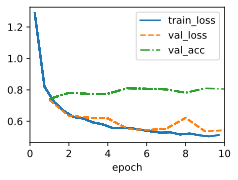

In [74]:
# 1.Change the number of hidden units num_hiddens and plot how its number affects the accuracy of the model. What is the best value of this hyperparameter?

class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation= 'relu'),
            tf.keras.layers.Dense(num_outputs)])
        
model = MLP(num_outputs=10, num_hiddens= 5, lr=0.1)
trainer.fit(model, data)


In [78]:
import math as math
math.sqrt(784*10)

88.54377448471462

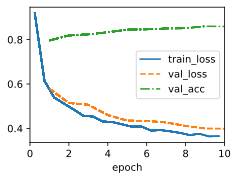

In [80]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation= 'relu'),
            tf.keras.layers.Dense(num_outputs)])
        
model = MLP(num_outputs=10, num_hiddens= 88, lr=0.1)
trainer.fit(model, data)

By following a small set of clear rules, one can programmatically set a competent network architecture and can efficiently decide the number of hidden layers and nodes in a neural network.

# Choosing Hidden Layers

Well if the data is linearly separable then you don't need any hidden layers at all. 
If data is less complex and is having fewer dimensions or features then neural networks with 1 to 2 hidden layers would work.
If data is having large dimensions or features then to get an optimum solution, 3 to 5 hidden layers can be used. 
It should be kept in mind that increasing hidden layers would also increase the complexity of the model and choosing hidden layers such as 8, 9, or in two digits may sometimes lead to overfitting.

# Choosing Nodes in Hidden Layers

Once hidden layers have been decided the next task is to choose the number of nodes in each hidden layer.

The number of hidden neurons should be between the size of the input layer and the output layer.
The most appropriate number of hidden neurons is:

# sqrt(input layer nodes * output layer nodes)

The number of hidden neurons should keep on decreasing in subsequent layers to get more and more close to pattern 
and feature extraction and to identify the target class.

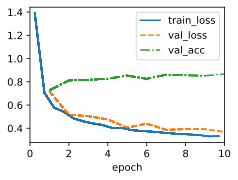

In [83]:
#Try adding a hidden layer to see how it affects the results
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation= 'relu'),
            tf.keras.layers.Dense(num_hiddens, activation= 'relu'),
            tf.keras.layers.Dense(num_hiddens, activation= 'relu'),
            tf.keras.layers.Dense(num_hiddens, activation= 'relu'),
            tf.keras.layers.Dense(num_hiddens, activation= 'relu'),
            tf.keras.layers.Dense(num_hiddens, activation= 'relu'),
            tf.keras.layers.Dense(num_outputs)])
        
model = MLP(num_outputs=10, num_hiddens= 88, lr=0.1)
trainer.fit(model, data)



Trying to simulate what would happen if we keep adding hidden layers, the network will become more complex, will learn too much from
the training distribution and fail to generalize on unseen data as we can see in the above graph that validation accuracy has decreased thus indicating model overfitting.

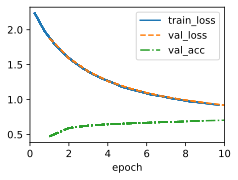

In [84]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation= 'relu'),
            tf.keras.layers.Dense(num_outputs)])
        
model = MLP(num_outputs=10, num_hiddens= 256, lr=0.001)
trainer.fit(model, data)

both training and testing data are drawn independently from identical distributuions. i.i.d assumption. there can be signifiacnt problems 
arriving from iid assumptions


# Polynomial Regression and overfitting of data

In [91]:
max_degree = 20 # Maximum degree of the polynomial
n_train, n_test = 100, 100 # Training and test dataset sizes
true_w = np.zeros(max_degree) # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])
features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1) # `gamma(n)` = (n-1)!
# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [92]:
features[:2], poly_features[:2, :], labels[:2]

(array([[-0.91503084],
        [ 0.76272464]]),
 array([[ 1.00000000e+00, -9.15030837e-01,  4.18640703e-01,
         -1.27689719e-01,  2.92100087e-02, -5.34561183e-03,
          8.15233274e-04, -1.06566222e-04,  1.21889234e-05,
         -1.23924883e-06,  1.13395096e-07, -9.43272838e-09,
          7.19269755e-10, -5.06272316e-11,  3.30896270e-12,
         -2.01853521e-13,  1.15438868e-14, -6.21353724e-16,
          3.15865435e-17, -1.52119269e-18],
        [ 1.00000000e+00,  7.62724638e-01,  2.90874451e-01,
          7.39523694e-02,  1.41013227e-02,  2.15108530e-03,
          2.73447629e-04,  2.97950337e-05,  2.84067573e-06,
          2.40739269e-07,  1.83617779e-08,  1.27318001e-09,
          8.09238163e-11,  4.74789132e-12,  2.58666677e-13,
          1.31527623e-14,  6.26996075e-16,  2.81309039e-17,
          1.19200738e-18,  4.78512288e-20]]),
 array([1.7323128, 5.356288 ]))

In [93]:
def train(train_features, test_features, train_labels, test_labels,num_epochs=400):
    loss = gluon.loss.L2Loss()
    net = nn.Sequential()
# Switch off the bias since we already catered for it in the polynomial
# features
    net.add(nn.Dense(1, use_bias=False))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    test_iter = d2l.load_array((test_features, test_labels), batch_size, is_train=False)
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
    xlim=[1, num_epochs], ylim=[1e-3, 1e2],
    legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
            evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data().asnumpy())


AttributeError: module 'd2l.mxnet' has no attribute 'train_epoch_ch3'

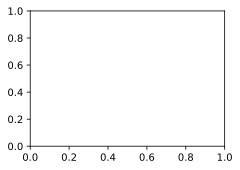

In [94]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
labels[:n_train], labels[n_train:])

# Summary

1. Since the generalization error cannot be estimated based on the training error, simply miniimizing the training error will not necessarily mean a reduction in the generalization error.
   Machine learning models need to be careful to safeguard against overfitting so as to miniimize the generalization error.
2. A validation set can be used for model selection, provided that it is not used too liberally.
3. Underfitting means that a model is not able to reduce the training error. When training error
   is much lower than validation error, there is overfitting.
4. We should choose an appropriately complex model and avoid using insufficient training
   samples.